<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab6_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: **Display the histogram of the image**

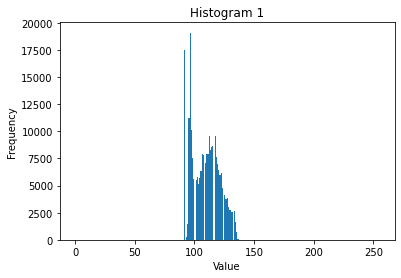

Input Image


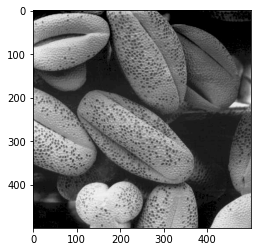

In [ ]:
#necessary imports
import matplotlib.pyplot as plt
import cv2
import numpy as np

#load the image
im = cv2.imread('image_lab6.tif', 0)

#label the histogram
plt.title("Histogram 1")
plt.xlabel("Value")
plt.ylabel("Frequency")

#plot the histogram
plt.hist(im.ravel(), bins = 255, range=(0,255))

#display histogram
plt.show()


## Task 1: **Equalize the histogram and display the new image**

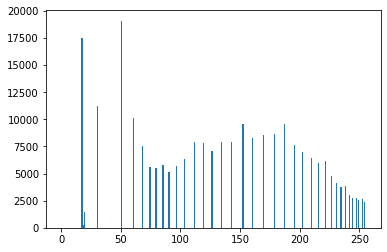

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('image_lab6.tif',0) 
row, col = img.shape[:2]

def df(img):  # to make a histogram (count distribution frequency)
    values = [0]*256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i,j]] += 1
    return values


def cdf(hist):  # cumulative distribution frequency
    cdf = [0] * len(hist)   #len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i]= cdf[i-1]+hist[i]
    # Now we normalize the histogram
    cdf = [ele*255/cdf[-1] for ele in cdf]      # What your function h was doing before
    return cdf

def equalize_image(image):
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values. Scipy alternative exists
    image_equalized = np.interp(image, range(0,256), my_cdf)
    return image_equalized

eq = np.asarray(equalize_image(img))
plt.hist(eq.ravel(), bins = 255, range=(0,255))
plt.show()

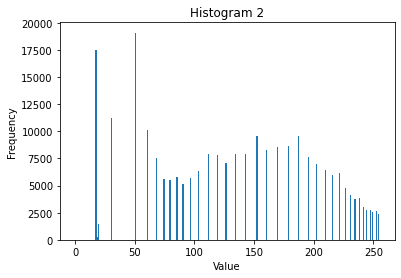

In [ ]:
#necessary imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

#read the image
img = cv2.imread('image_lab6.tif',0) 
#inout dimensions of the image
row, col = img.shape[:2]
#create an array of size 256 initialized with 0
array = np.zeros(256)

#create a histogram manually in the array
for i in range(row):
  for j in range(col):
      array[img[i,j]] += 1 

#vectorized operation to obtain pdf by dividing with total pixels
array /= (row * col)

#obtain cdf by adding subsequent pdf values
for y in range(1,len(array)):#starts from 1 as negative access causes error and first cdf values is same as first pdf value
  array[y] += array[y-1] 

#vectorized operation to obtain equalized intensity values by multiplying with 255 as an integer
array = (array * 255).astype('uint8')

#map the equalized intensity values to input image arrat
for i in range(row):
  for j in range(col):
      img[i,j] = array[img[i,j]]  
  
#label plot second histogram
plt.title("Histogram 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.hist(img.ravel(), bins = 255, range=(0,255))
plt.show() #display second histogram




Input Image


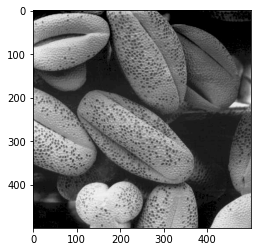

Output Image


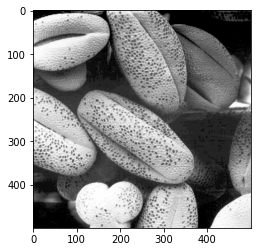

Input Histogram


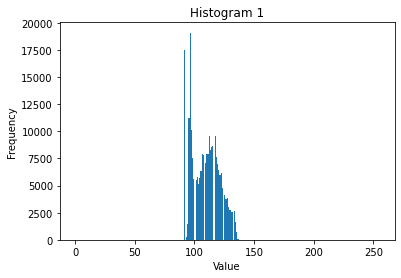

Output Histogram


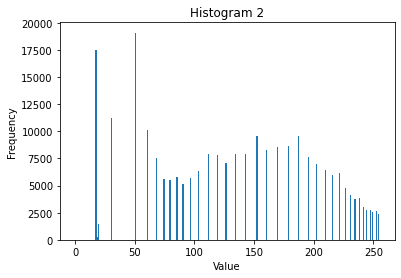

In [ ]:
#necessary imports
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.image as mpimg

#load the image
im = mpimg.imread('image_lab6.tif', 0)

#print input image
print("Input Image")
plt.imshow(im, cmap = "gray")
plt.show()

#print input image
print("Output Image")
plt.imshow(img, cmap = "gray")
plt.show()

print("Input Histogram")
#label the histogram
plt.title("Histogram 1")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plot the histogram
plt.hist(im.ravel(), bins = 255, range=(0,255))
#display histogram
plt.show()

print("Output Histogram")
#label plot second histogram
plt.title("Histogram 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.hist(img.ravel(), bins = 255, range=(0,255))
plt.show() #display second histogram



